In [198]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import datetime

from sklearn import ensemble

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.externals import joblib
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import pylab as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pickle

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
    #In the cmd line type: conda install python-graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

In [172]:
df = pickle.load(open("df_a.dat", "rb"))

In [41]:
# פיצול לטריין וטסט
train_df, test_df= train_test_split(df, test_size = 0.2, random_state=7)
y = train_df["No-show_"]
X = train_df.drop(['No-show_'], axis = 1)

y_test=test_df["No-show_"]
X_test=test_df.drop(['No-show_'], axis = 1)

# עץ החלטה גדול

In [281]:
tree_clf = DecisionTreeClassifier (max_depth = 9, class_weight={0:2,1:10})
tree_clf.fit (X, y)

DecisionTreeClassifier(class_weight={0: 2, 1: 10}, criterion='gini',
            max_depth=9, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

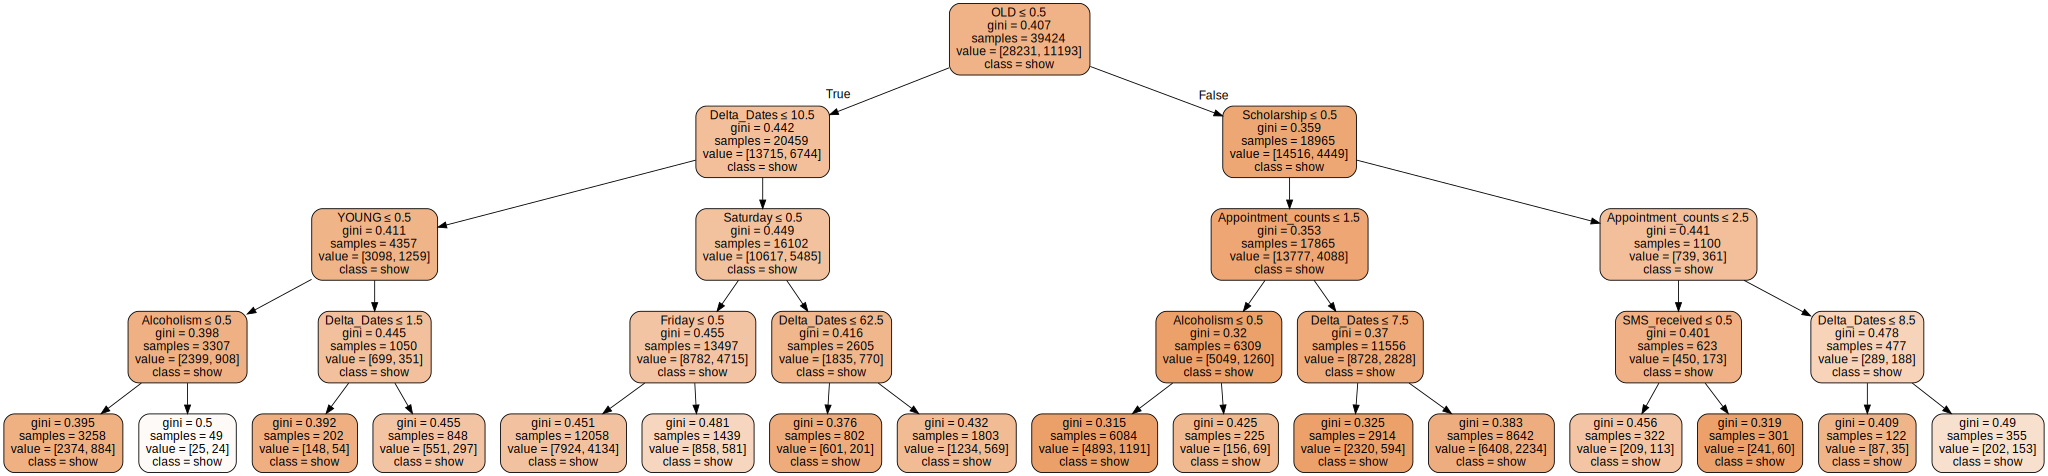

In [52]:
from sklearn.tree import export_graphviz #In the cmd line type: conda install python-graphviz
import graphviz

dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = ['SMS_received', 'Gender_', 'Delta_Dates', 'Scholarship', 'Hipertension',
       'Diabetes', 'prcp', 'temp', 'Alcoholism', 'Handcap', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Appointment_counts', 'ADOULT', 'KID', 'OLD', 'YOUNG' ],
                           class_names = ["show", "no_show" ],
                           rounded = True, filled=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [282]:
y_test_predict = tree_clf.predict (X_test)

In [283]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[ 444, 6607],
       [ 101, 2705]], dtype=int64)

In [284]:
recall_score(y_test, y_test_predict)

0.9640057020669993

In [285]:
precision_score(y_test, y_test_predict)

0.29048539518900346

## Random Forest

In [272]:
rnd_clf = RandomForestClassifier(n_estimators=80,max_depth = 9, class_weight={0:2,1:10})
rnd_clf.fit (X, y)
y_pred_rf = rnd_clf.predict(X_test)

In [273]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[ 122, 6929],
       [  21, 2785]], dtype=int64)

In [274]:
precision_score(y_test, y_pred_rf)

0.2866996088120239

In [275]:
recall_score(y_test, y_pred_rf)

0.9925160370634355

## GBM 

In [280]:
clf_gb = ensemble.GradientBoostingClassifier(n_estimators=80,max_depth = 9)
clf_gb.fit(X, y)
y_pred_gb = clf_gb.predict(X_test)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [277]:
confusion_matrix(y_test, y_pred_gb)

array([[6795,  256],
       [2601,  205]], dtype=int64)

In [278]:
precision_score(y_test, y_pred_gb)

0.44468546637744033

In [279]:
recall_score(y_test, y_pred_gb)

0.07305773342836779